# Artificial neural networks

##### Veštačke neuronske mreže predstavljaju tehniku mašinskog učenja koja oponaša funkcionisanje ljudskog mozga. Koriste se u svrhu aproksimacije funkcija koje mogu zavisiti od velike količine ulaznih podataka, a koje su u principu nepoznate. Veštačke neuronske mreže su sistemi međusobno povezanih neurona,koji šalju poruke jedni drugima. Veze između ovih neurona imaju numeričke težine koje mogu biti podložne promenama u zavisnosti od iskustva, što neuronske mreže čini adaptivnim i sposobnim za učenje.

#### Na početku programa uključujemo biblioteke koje ćemo koristiti za preprocesiranje podataka i kreiranje veštačkih neuronskih mreža

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras import layers

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

##### Zatim vršimo učitavanje dataset-a

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Zbog kategoričkih atributa, potrebno je definisati funkciju:

In [3]:
def one_hot_encoding(data):
    categorical_features = ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country', 'Class']

    for col in categorical_features:
        one_hot = pd.get_dummies(data[col])
        column_list = []
        for c in one_hot.columns:
            column_list.append(col + '_' + str(c))
        one_hot.columns = column_list
        data = data.drop(col, axis=1)
        data = data.join(one_hot)
    return data

In [4]:
oheDF = one_hot_encoding(df)
oheDF.head()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Class_ <=50K,Class_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
oheDF = oheDF[~((oheDF['Workclass_ ?'] == 1) | (oheDF['Occupation_ ?'] == 1) | (oheDF['Native-country_ ?'] == 1))]

In [6]:
X= oheDF.drop("Class_ >50K", axis=1)
y= oheDF["Class_ >50K"]
X= X.drop("Class_ <=50K", axis=1)
X.head()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class_ >50K, dtype: uint8

#### Nakon odvajanja kategoričkih atributa po kategorijama, potrebno je izvršiti skaliranje atributa

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.30136986, 0.04333771, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.45205479, 0.04727738, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.28767123, 0.1372439 , 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.56164384, 0.09391367, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.06849315, 0.1276201 , 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.47945205, 0.18638336, 0.53333333, ..., 1.        , 0.        ,
        0.        ]])

#### Ulazni skup delimo na skup za treniranje i skup za validaciju i testiranje. Zatim skup za validaciju i treniranje delimo na navedena dva skupa

In [9]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(21113, 108) (4524, 108) (4525, 108) (21113,) (4524,) (4525,)


#### Kreiramo model veštačkih neuronskih mreža. Kreirani model ima 3 sloja. Prva dva imaju 32 čvora, dok poslednji ima 1. U prva dva sloja korišćena je aktivaciona funkcija "relu", u poslednjem "sigmoid". Za optimizaciju korišćen je "sgd". Ovi parametri su fiksirani, a u narednom delu ćemo kreirati model sa različitim loss funkcijama.

## Binary crossentropy

In [10]:
model = Sequential([Dense(32, activation='relu', input_shape=(108,)), 
   Dense(32, activation='relu'), 
   Dense(1, activation='sigmoid'),])
model.compile(optimizer='sgd',  
            loss='binary_crossentropy', 
            metrics=['accuracy'])
hist = model.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))

Instructions for updating:
Colocations handled automatically by placer.
Train on 21113 samples, validate on 4524 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/70
21113/21113 [==============================] - 3s 138us/sample - loss: 0.5314 - acc: 0.7498 - val_loss: 0.4706 - val_acc: 0.7392
Epoch 2/70
21113/21113 [==============================] - 3s 122us/sample - loss: 0.4313 - acc: 0.7943 - val_loss: 0.4208 - val_acc: 0.8006
Epoch 3/70
21113/21113 [==============================] - 2s 109us/sample - loss: 0.4009 - acc: 0.8122 - val_loss: 0.3997 - val_acc: 0.8139
Epoch 4/70
21113/21113 [==============================] - 2s 118us/sample - loss: 0.3858 - acc: 0.8190 - val_loss: 0.3868 - val_acc: 0.8221
Epoch 5/70
21113/21113 [==============================] - 3s 118us/sample - loss: 0.3758 - acc: 0.8231 - val_loss: 0.3780 - val_acc: 0.8238
Epoch 6/70
21113/21113 [==============================] - 3s 133us/sample - loss: 0.3693 - acc: 0.8244 - val_loss: 0.3750 - val_acc

In [11]:
model.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 41us/sample - loss: 0.3250 - acc: 0.8449


0.84486187

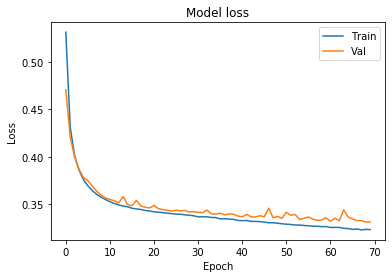

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

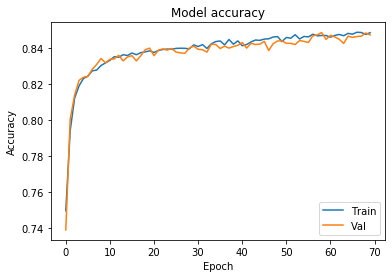

In [13]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Loss funkcija 2

In [10]:
model2 = Sequential([Dense(32, activation='relu', input_shape=(108,)), 
   Dense(32, activation='relu'), 
   Dense(1, activation='sigmoid'),])

def custom_loss(y_true, y_pred):
    loss = K.mean(K.sum(K.square((y_true-y_pred)/10)))
    return loss

model2.compile(optimizer='sgd',  
            loss=custom_loss, 
            metrics=['accuracy'])

hist = model2.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))

Instructions for updating:
Colocations handled automatically by placer.
Train on 21113 samples, validate on 4524 samples
Epoch 1/70
21113/21113 [==============================] - 2s 89us/sample - loss: 0.0625 - acc: 0.7539 - val_loss: 0.0595 - val_acc: 0.7451
Epoch 2/70
21113/21113 [==============================] - 2s 90us/sample - loss: 0.0570 - acc: 0.7539 - val_loss: 0.0565 - val_acc: 0.7451
Epoch 3/70
21113/21113 [==============================] - 2s 82us/sample - loss: 0.0543 - acc: 0.7539 - val_loss: 0.0541 - val_acc: 0.7451
Epoch 4/70
21113/21113 [==============================] - 2s 94us/sample - loss: 0.0520 - acc: 0.7539 - val_loss: 0.0519 - val_acc: 0.7451
Epoch 5/70
21113/21113 [==============================] - 2s 90us/sample - loss: 0.0500 - acc: 0.7540 - val_loss: 0.0500 - val_acc: 0.7451
Epoch 6/70
21113/21113 [==============================] - 2s 84us/sample - loss: 0.0483 - acc: 0.7578 - val_loss: 0.0485 - val_acc: 0.7555
Epoch 7/70
21113/21113 [=====================

In [11]:
model2.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 44us/sample - loss: 0.0366 - acc: 0.8360


0.8360221

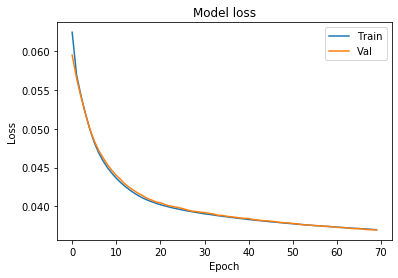

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

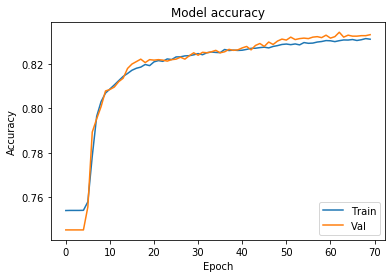

In [13]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Loss funkcija 3

In [14]:
model3 = Sequential([Dense(32, activation='relu', input_shape=(108,)), 
   Dense(32, activation='relu'), 
   Dense(1, activation='sigmoid'),])

def new_loss (Ytrue, Ypred):
    nb_devide = K.sqrt(K.sum(K.square(Ypred),axis = 1, keepdims=True))
    predicted = Ypred / nb_devide
    return K.sum(K.square(Ytrue - predicted))

model3.compile(optimizer='sgd',  
            loss='logcosh', 
            metrics=['accuracy'])

hist = model3.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))


Train on 21113 samples, validate on 4524 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/70
21113/21113 [==============================] - 2s 97us/sample - loss: 0.0987 - acc: 0.7430 - val_loss: 0.0897 - val_acc: 0.7451
Epoch 2/70
21113/21113 [==============================] - 2s 91us/sample - loss: 0.0843 - acc: 0.7539 - val_loss: 0.0830 - val_acc: 0.7451
Epoch 3/70
21113/21113 [==============================] - 2s 91us/sample - loss: 0.0790 - acc: 0.7539 - val_loss: 0.0785 - val_acc: 0.7451
Epoch 4/70
21113/21113 [==============================] - 2s 90us/sample - loss: 0.0749 - acc: 0.7539 - val_loss: 0.0748 - val_acc: 0.7451
Epoch 5/70
21113/21113 [==============================] - 2s 115us/sample - loss: 0.0717 - acc: 0.7539 - val_loss: 0.0718 - val_acc: 0.7451
Epoch 6/70
21113/21113 [==============================] - 2s 113us/sample - loss: 0.0692 - acc: 0.7560 - val_loss: 0.0695 - val_acc: 0.7544
Epoch 7/70
21113/21113 [==============================] - 2s 118us/

In [15]:
model3.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 62us/sample - loss: 0.0527 - acc: 0.8409


0.840884

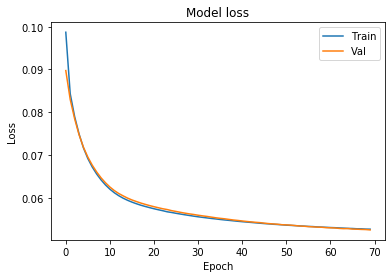

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

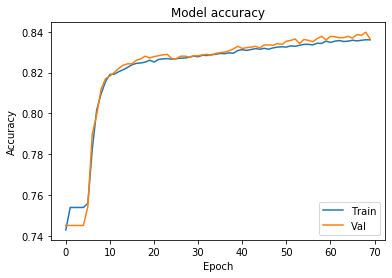

In [17]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Loss funkcija 4

In [19]:
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

model4 = Sequential([Dense(32, activation='relu', input_shape=(108,)), 
   Dense(32, activation='relu'), 
   Dense(1, activation='sigmoid'),])


model4.compile(optimizer='sgd',  
            loss=sign_penalty, 
            metrics=['accuracy'])

hist = model4.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))

Train on 21113 samples, validate on 4524 samples
Epoch 1/70
21113/21113 [==============================] - 3s 123us/sample - loss: 0.1743 - acc: 0.7538 - val_loss: 0.1602 - val_acc: 0.7451
Epoch 2/70
21113/21113 [==============================] - 2s 108us/sample - loss: 0.1484 - acc: 0.7684 - val_loss: 0.1464 - val_acc: 0.7843
Epoch 3/70
21113/21113 [==============================] - 2s 104us/sample - loss: 0.1394 - acc: 0.7961 - val_loss: 0.1399 - val_acc: 0.7949
Epoch 4/70
21113/21113 [==============================] - 2s 107us/sample - loss: 0.1344 - acc: 0.8085 - val_loss: 0.1353 - val_acc: 0.8053
Epoch 5/70
21113/21113 [==============================] - 3s 119us/sample - loss: 0.1307 - acc: 0.8149 - val_loss: 0.1318 - val_acc: 0.8156
Epoch 6/70
21113/21113 [==============================] - 2s 118us/sample - loss: 0.1280 - acc: 0.8188 - val_loss: 0.1294 - val_acc: 0.8192
Epoch 7/70
21113/21113 [==============================] - 3s 119us/sample - loss: 0.1259 - acc: 0.8216 - val_lo

In [20]:
model4.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 41us/sample - loss: 0.1103 - acc: 0.8385


0.83845305

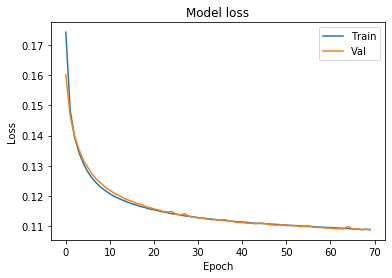

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

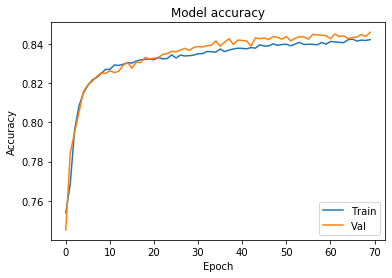

In [22]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Loss funkcija 5 - Squared hinge

In [24]:
model5 = Sequential([Dense(32, activation='relu', input_shape=(108,)), 
   Dense(32, activation='relu'), 
   Dense(1, activation='sigmoid'),])


model5.compile(optimizer='sgd',  
            loss='squared_hinge', 
            metrics=['accuracy'])

hist = model5.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))

Train on 21113 samples, validate on 4524 samples
Epoch 1/70
21113/21113 [==============================] - 3s 130us/sample - loss: 0.7763 - acc: 0.2877 - val_loss: 0.7527 - val_acc: 0.2549
Epoch 2/70
21113/21113 [==============================] - 2s 111us/sample - loss: 0.7583 - acc: 0.2461 - val_loss: 0.7477 - val_acc: 0.2549
Epoch 3/70
21113/21113 [==============================] - 2s 111us/sample - loss: 0.7559 - acc: 0.2461 - val_loss: 0.7465 - val_acc: 0.2549
Epoch 4/70
21113/21113 [==============================] - 2s 110us/sample - loss: 0.7551 - acc: 0.2461 - val_loss: 0.7460 - val_acc: 0.2549
Epoch 5/70
21113/21113 [==============================] - 2s 111us/sample - loss: 0.7547 - acc: 0.2461 - val_loss: 0.7458 - val_acc: 0.2549
Epoch 6/70
21113/21113 [==============================] - 3s 122us/sample - loss: 0.7545 - acc: 0.2461 - val_loss: 0.7456 - val_acc: 0.2549
Epoch 7/70
21113/21113 [==============================] - 3s 145us/sample - loss: 0.7544 - acc: 0.2461 - val_lo

In [25]:
model5.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 48us/sample - loss: 0.7437 - acc: 0.2564


0.2563536

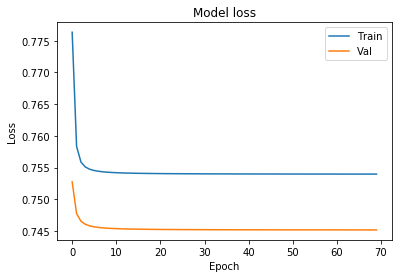

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

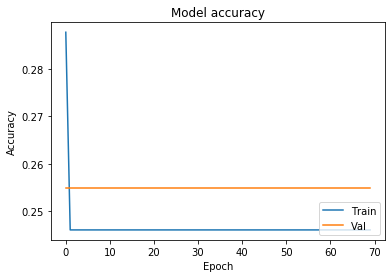

In [27]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Loss funkcija 6

In [28]:
def loss_6(Y_true, Y_pred):
    return K.mean(K.sum(K.square((Y_true-Y_pred)/(Y_true*Y_pred))))

model6 = Sequential([Dense(32, activation='relu', input_shape=(108,)), 
   Dense(32, activation='relu'), 
   Dense(1, activation='sigmoid'),])


model6.compile(optimizer='sgd',  
            loss=loss_6, 
            metrics=['accuracy'])

hist = model6.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))

Train on 21113 samples, validate on 4524 samples
Epoch 1/70
21113/21113 [==============================] - 2s 114us/sample - loss: nan - acc: 0.7539 - val_loss: nan - val_acc: 0.7451
Epoch 2/70
21113/21113 [==============================] - 2s 116us/sample - loss: nan - acc: 0.7539 - val_loss: nan - val_acc: 0.7451
Epoch 3/70
21113/21113 [==============================] - 3s 123us/sample - loss: nan - acc: 0.7539 - val_loss: nan - val_acc: 0.7451
Epoch 4/70
21113/21113 [==============================] - 2s 97us/sample - loss: nan - acc: 0.7539 - val_loss: nan - val_acc: 0.7451
Epoch 5/70
21113/21113 [==============================] - 2s 95us/sample - loss: nan - acc: 0.7539 - val_loss: nan - val_acc: 0.7451
Epoch 6/70
21113/21113 [==============================] - 2s 116us/sample - loss: nan - acc: 0.7539 - val_loss: nan - val_acc: 0.7451
Epoch 7/70
21113/21113 [==============================] - 2s 114us/sample - loss: nan - acc: 0.7539 - val_loss: nan - val_acc: 0.7451
Epoch 8/70
2111

In [29]:
model6.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 43us/sample - loss: nan - acc: 0.7436


0.7436464

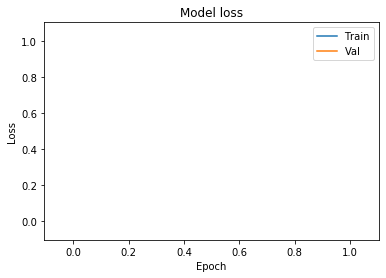

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

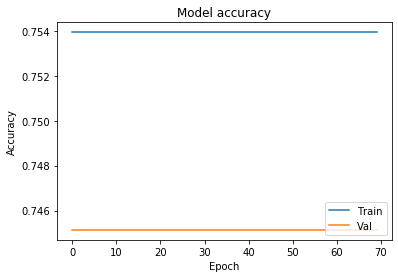

In [31]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Loss funkcija 7

In [33]:
def loss_7(y_true, y_pred):
    noise = 10
    return K.mean(K.square(y_pred - y_true) - K.square(y_true - noise), axis=-1)

model7 = Sequential([Dense(32, activation='relu', input_shape=(108,)), 
   Dense(32, activation='relu'), 
   Dense(1, activation='sigmoid'),])

model7.compile(optimizer='sgd',  
            loss= loss_7, 
            metrics=['accuracy'])

hist = model7.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))

Train on 21113 samples, validate on 4524 samples
Epoch 1/70
21113/21113 [==============================] - 2s 104us/sample - loss: -95.1339 - acc: 0.7539 - val_loss: -94.9763 - val_acc: 0.7451
Epoch 2/70
21113/21113 [==============================] - 3s 119us/sample - loss: -95.1548 - acc: 0.7539 - val_loss: -94.9923 - val_acc: 0.7451
Epoch 3/70
21113/21113 [==============================] - 2s 112us/sample - loss: -95.1690 - acc: 0.7539 - val_loss: -95.0052 - val_acc: 0.7449
Epoch 4/70
21113/21113 [==============================] - 2s 115us/sample - loss: -95.1790 - acc: 0.7705 - val_loss: -95.0131 - val_acc: 0.7790
Epoch 5/70
21113/21113 [==============================] - 3s 122us/sample - loss: -95.1853 - acc: 0.7964 - val_loss: -95.0190 - val_acc: 0.8046
Epoch 6/70
21113/21113 [==============================] - 2s 110us/sample - loss: -95.1900 - acc: 0.8127 - val_loss: -95.0234 - val_acc: 0.8168
Epoch 7/70
21113/21113 [==============================] - 3s 122us/sample - loss: -95.1

In [34]:
model7.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 51us/sample - loss: -95.0197 - acc: 0.8393


0.839337

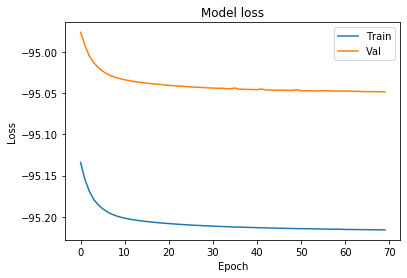

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

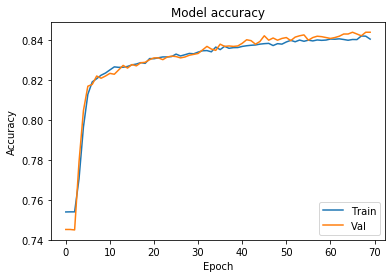

In [36]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Loss funkcija 8

In [37]:
_EPSILON = K.epsilon()
def loss_8(y_true, y_pred):
    y_pred = K.clip(y_pred, _EPSILON, 1.0-_EPSILON)
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

model8 = Sequential([Dense(32, activation='relu', input_shape=(108,)), 
   Dense(32, activation='relu'), 
   Dense(1, activation='sigmoid'),])


model8.compile(optimizer='sgd',  
            loss= loss_8, 
            metrics=['accuracy'])

hist = model8.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))

Train on 21113 samples, validate on 4524 samples
Epoch 1/70
21113/21113 [==============================] - 3s 128us/sample - loss: 0.5209 - acc: 0.7529 - val_loss: 0.4603 - val_acc: 0.7478
Epoch 2/70
21113/21113 [==============================] - 2s 116us/sample - loss: 0.4243 - acc: 0.7990 - val_loss: 0.4114 - val_acc: 0.8106
Epoch 3/70
21113/21113 [==============================] - 2s 117us/sample - loss: 0.3956 - acc: 0.8170 - val_loss: 0.3913 - val_acc: 0.8192
Epoch 4/70
21113/21113 [==============================] - 2s 108us/sample - loss: 0.3827 - acc: 0.8216 - val_loss: 0.3808 - val_acc: 0.8227
Epoch 5/70
21113/21113 [==============================] - 3s 128us/sample - loss: 0.3748 - acc: 0.8250 - val_loss: 0.3743 - val_acc: 0.8254
Epoch 6/70
21113/21113 [==============================] - 3s 124us/sample - loss: 0.3696 - acc: 0.8270 - val_loss: 0.3702 - val_acc: 0.8267
Epoch 7/70
21113/21113 [==============================] - 2s 107us/sample - loss: 0.3655 - acc: 0.8280 - val_lo

In [38]:
model8.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 50us/sample - loss: 0.3407 - acc: 0.8336


0.83359116

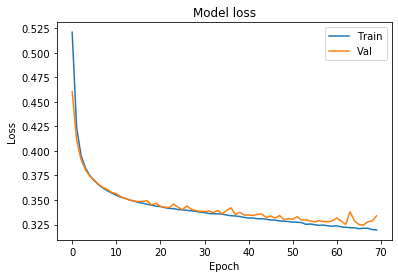

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

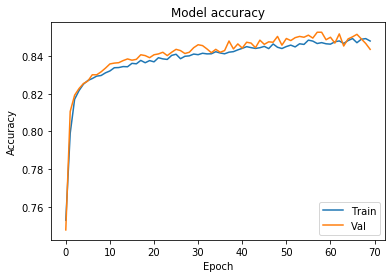

In [40]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Primetimo da je najbolji rezultat dala loss Binary crossentropy. Zbog toga ćemo u nastavku nju koristiti

### Ulazni broj atributa je veliki i nisu svi značajni za kreiranje modela. Zbog toga ćemo korišćenjem koeficijenta korelacije sa ciljnom klasom izabrati najznačajnije atribute za kreiranje modela:

In [41]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

#### Izdvojićemo 20 najznačajnih atributa:

In [48]:
cor_support, cor_feature = cor_selector(X, y, 20)
print(cor_feature)

['Workclass_ Self-emp-inc', 'Relationship_ Unmarried', 'Capital-loss', 'Education_ Prof-school', 'Occupation_ Other-service', 'Education_ Masters', 'Education_ Bachelors', 'Occupation_ Prof-specialty', 'Relationship_ Not-in-family', 'Occupation_ Exec-managerial', 'Sex_ Male', 'Sex_ Female', 'Capital-gain', 'Relationship_ Own-child', 'Hours-per-week', 'Age', 'Marital-status_ Never-married', 'Education-num', 'Relationship_ Husband', 'Marital-status_ Married-civ-spouse']


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


#### Iz početnog dataset-a izdvajamo samo značajne atribute i vršimo njihovo skaliranje

In [49]:
newdata = pd.DataFrame()
for i in range(20):
    newdata[cor_feature[i]] =X[cor_feature[i]]
print(newdata.describe())

       Workclass_ Self-emp-inc  Relationship_ Unmarried  Capital-loss  \
count             30162.000000             30162.000000  30162.000000   
mean                  0.035608                 0.106492     88.372489   
std                   0.185313                 0.308471    404.298370   
min                   0.000000                 0.000000      0.000000   
25%                   0.000000                 0.000000      0.000000   
50%                   0.000000                 0.000000      0.000000   
75%                   0.000000                 0.000000      0.000000   
max                   1.000000                 1.000000   4356.000000   

       Education_ Prof-school  Occupation_ Other-service  Education_ Masters  \
count            30162.000000               30162.000000        30162.000000   
mean                 0.017970                   0.106492            0.053942   
std                  0.132843                   0.308471            0.225907   
min                  0

In [50]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(newdata)

### Ponovo vršimo podelu na trening, validaciju i test skup

In [51]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

### Za dobijene podatke kreiramo novi model sa loss f-jom 1

In [53]:
model = Sequential([Dense(32, activation='relu', input_shape=(20,)), 
   Dense(32, activation='relu'), 
   Dense(1, activation='sigmoid'),])
model.compile(optimizer='sgd',  
            loss='binary_crossentropy', 
            metrics=['accuracy'])
hist = model.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))

Train on 21113 samples, validate on 4524 samples
Epoch 1/70
21113/21113 [==============================] - 4s 179us/sample - loss: 0.5177 - acc: 0.7400 - val_loss: 0.4528 - val_acc: 0.7708
Epoch 2/70
21113/21113 [==============================] - 3s 164us/sample - loss: 0.4280 - acc: 0.7970 - val_loss: 0.4151 - val_acc: 0.8106
Epoch 3/70
21113/21113 [==============================] - 3s 159us/sample - loss: 0.4012 - acc: 0.8176 - val_loss: 0.3993 - val_acc: 0.8170
Epoch 4/70
21113/21113 [==============================] - 3s 154us/sample - loss: 0.3897 - acc: 0.8214 - val_loss: 0.3917 - val_acc: 0.8174
Epoch 5/70
21113/21113 [==============================] - 3s 151us/sample - loss: 0.3839 - acc: 0.8225 - val_loss: 0.3872 - val_acc: 0.8196
Epoch 6/70
21113/21113 [==============================] - 3s 160us/sample - loss: 0.3796 - acc: 0.8229 - val_loss: 0.3831 - val_acc: 0.8234
Epoch 7/70
21113/21113 [==============================] - 3s 162us/sample - loss: 0.3762 - acc: 0.8242 - val_lo

In [54]:
model.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 67us/sample - loss: 0.3311 - acc: 0.8402


0.840221

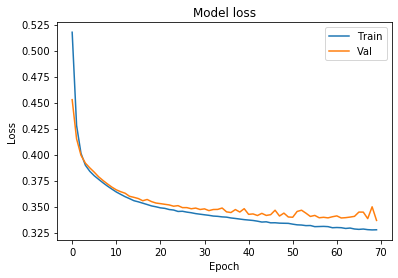

In [55]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

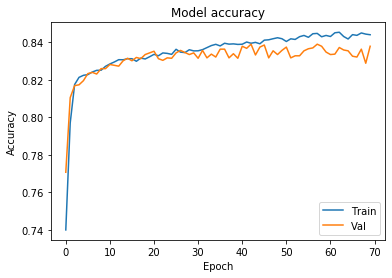

In [56]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Za dosadašnje modele 

## korišćena je 

## optimizacija

 ## sgd

## stochastic gradient descent

## Primenićemo i RMSprop:

In [58]:
model = Sequential([Dense(32, activation='relu', input_shape=(20,)), 
   Dense(32, activation='relu'), 
   Dense(1, activation='sigmoid'),])
model.compile(optimizer='rmsprop',  
            loss='binary_crossentropy', 
            metrics=['accuracy'])
hist = model.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))

Train on 21113 samples, validate on 4524 samples
Epoch 1/70
21113/21113 [==============================] - 3s 145us/sample - loss: 0.3986 - acc: 0.8114 - val_loss: 0.3699 - val_acc: 0.8252
Epoch 2/70
21113/21113 [==============================] - 2s 112us/sample - loss: 0.3585 - acc: 0.8299 - val_loss: 0.3594 - val_acc: 0.8331
Epoch 3/70
21113/21113 [==============================] - 3s 119us/sample - loss: 0.3477 - acc: 0.8374 - val_loss: 0.3498 - val_acc: 0.8422
Epoch 4/70
21113/21113 [==============================] - 2s 117us/sample - loss: 0.3409 - acc: 0.8399 - val_loss: 0.3452 - val_acc: 0.8375
Epoch 5/70
21113/21113 [==============================] - 2s 113us/sample - loss: 0.3363 - acc: 0.8424 - val_loss: 0.3442 - val_acc: 0.8415
Epoch 6/70
21113/21113 [==============================] - 3s 140us/sample - loss: 0.3350 - acc: 0.8427 - val_loss: 0.3422 - val_acc: 0.8384
Epoch 7/70
21113/21113 [==============================] - 3s 150us/sample - loss: 0.3331 - acc: 0.8441 - val_lo

In [59]:
model.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 54us/sample - loss: 0.3307 - acc: 0.8482


0.8481768

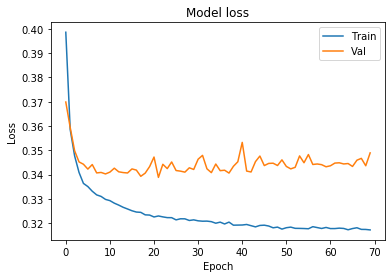

In [60]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

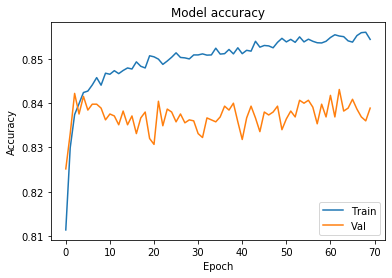

In [61]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Za sprečavanje overfitting-a mogu se iskoristiti dropout slojevi koji slučajno zanemaruju pojedine čvorove tokom treniranja. Dodaćemo jedan takav sloj u prethodnu mrežu:

In [67]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(20,))) 
model.add(Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',  
            loss='binary_crossentropy', 
            metrics=['accuracy'])

hist = model.fit(X_train, Y_train, 
         batch_size=32, epochs=70, 
         validation_data=(X_val, Y_val))

Train on 21113 samples, validate on 4524 samples
Epoch 1/70
21113/21113 [==============================] - 3s 162us/sample - loss: 0.4234 - acc: 0.8028 - val_loss: 0.3760 - val_acc: 0.8234
Epoch 2/70
21113/21113 [==============================] - 3s 143us/sample - loss: 0.3744 - acc: 0.8285 - val_loss: 0.3651 - val_acc: 0.8305
Epoch 3/70
21113/21113 [==============================] - 3s 135us/sample - loss: 0.3621 - acc: 0.8342 - val_loss: 0.3563 - val_acc: 0.8353
Epoch 4/70
21113/21113 [==============================] - 3s 142us/sample - loss: 0.3523 - acc: 0.8385 - val_loss: 0.3515 - val_acc: 0.8353
Epoch 5/70
21113/21113 [==============================] - 3s 131us/sample - loss: 0.3462 - acc: 0.8417 - val_loss: 0.3447 - val_acc: 0.8382
Epoch 6/70
21113/21113 [==============================] - 3s 125us/sample - loss: 0.3408 - acc: 0.8424 - val_loss: 0.3430 - val_acc: 0.8349
Epoch 7/70
21113/21113 [==============================] - 2s 118us/sample - loss: 0.3380 - acc: 0.8468 - val_lo

In [68]:
model.evaluate(X_test, Y_test)[1]

4525/4525 [==============================] - 0s 65us/sample - loss: 0.3311 - acc: 0.8497


0.84972376

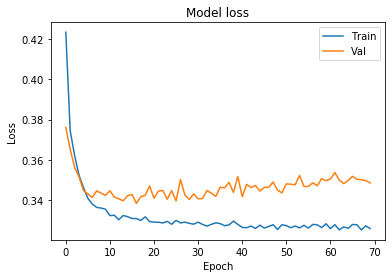

In [69]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

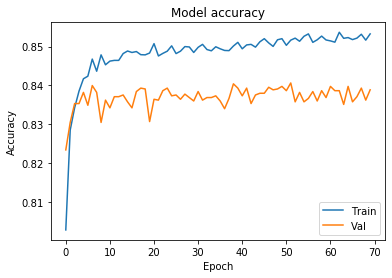

In [70]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()